<a href="https://colab.research.google.com/github/HumayDS/Big-data-analysis/blob/main/Lesson_14_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Datalari oxuduruq, lazimsiz unnamed columnu silirik
import numpy as np
import pandas as pd
bikes = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/bikes_big_dt.csv',index_col=False)
bikeshop = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/bikeshop_big_dt.csv', index_col=False)
orderlines = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Big-data-analysis/main/orderlines_big_dt.csv', index_col=False)
bikes.drop('Unnamed: 0' , axis =1 , inplace = True)
bikeshop.drop('Unnamed: 0' , axis =1 , inplace = True)
orderlines.drop('Unnamed: 0' , axis =1 , inplace = True)

In [2]:
# Bikes- Velosipedler haqqinda melumatlara baxaq

bikes.head()


,product.id,model,description,price
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road - Elite Road - Carbon,7990
3,4,Supersix Evo Hi-Mod Dura Ace 2,Road - Elite Road - Carbon,5330
4,5,Supersix Evo Hi-Mod Utegra,Road - Elite Road - Carbon,4260


In [3]:
## Velosipedler satilan magazalar haqqinda melumatlar
bikeshop.head()

,customer.id,bikeshop.name,location
0,1,Pittsburgh Mountain Machines,"Pittsburgh, PA"
1,2,Ithaca Mountain Climbers,"Ithaca, NY"
2,3,Columbus Race Equipment,"Columbus, OH"
3,4,Detroit Cycles,"Detroit, MI"
4,5,Cincinnati Speed,"Cincinnati, OH"


In [4]:
##Orderlines - satishlar haqqinda melumatlar
orderlines.head()

,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1,2011-01-07,2,48,1
1,1,2,2011-01-07,2,52,1
2,2,1,2011-01-10,10,76,1
3,2,2,2011-01-10,10,52,1
4,3,1,2011-01-10,6,2,1


In [5]:
# Bikes ve orderlines setlerini product.id key columna görə birləşdirirəm
bikes_orderlines = pd.merge(bikes, orderlines, how = 'left', on = 'product.id')
bikes_orderlines.head()


,product.id,model,description,price,order.id,order.line,order.date,customer.id,quantity
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1


In [6]:
orderlines.shape

(15644, 6)

In [7]:
bikes_orderlines.shape

(15644, 9)

In [8]:
# yaratdigim merged setle bikeshop haqqqinda melumatari birlesdirirem

bikes_merged = pd.merge(bikes_orderlines, bikeshop, how='left', on='customer.id')
bikes_merged.head()

,product.id,model,description,price,order.id,order.line,order.date,customer.id,quantity,bikeshop.name,location
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY"
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR"
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH"
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"


In [9]:
## Dataseti df adlandırıram
df = bikes_merged

In [10]:
##tipleri haqqinda melumatlara baxiram
bikes_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product.id     15644 non-null  int64 
 1   model          15644 non-null  object
 2   description    15644 non-null  object
 3   price          15644 non-null  int64 
 4   order.id       15644 non-null  int64 
 5   order.line     15644 non-null  int64 
 6   order.date     15644 non-null  object
 7   customer.id    15644 non-null  int64 
 8   quantity       15644 non-null  int64 
 9   bikeshop.name  15644 non-null  object
 10  location       15644 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.4+ MB


In [11]:
# datasetde unikal deyerlerin sayina baxiram
df.nunique()


product.id         97
model              97
description        13
price              53
order.id         2000
order.line         30
order.date        962
customer.id        30
quantity           10
bikeshop.name      30
location           30
dtype: int64

In [12]:
#Deyisenlerin unikal deyerlerinin siyahisina baxiram
df['location'].unique()

array(['Louisville, KY', 'Oklahoma City, OK', 'Portland, OR',
       'Cincinnati, OH', 'Tampa, FL', 'New Orleans, LA', 'Ann Arbor, MI',
       'San Antonio, TX', 'Ithaca, NY', 'Miami, FL', 'Las Vegas, NV',
       'Providence, RI', 'Albuquerque, NM', 'San Francisco, CA',
       'Austin, TX', 'Wichita, KS', 'Phoenix, AZ', 'Denver, CO',
       'Detroit, MI', 'Minneapolis, MN', 'Kansas City, KS',
       'New York, NY', 'Pittsburgh, PA', 'Indianapolis, IN',
       'Nashville, TN', 'Philadelphia, PA', 'Seattle, WA', 'Columbus, OH',
       'Dallas, TX', 'Los Angeles, CA'], dtype=object)

In [13]:
#sutun adlarina baxiram
df.columns

Index(['product.id', 'model', 'description', 'price', 'order.id', 'order.line',
       'order.date', 'customer.id', 'quantity', 'bikeshop.name', 'location'],
      dtype='object')

In [14]:
# Sutun adlarinda noqteni _ evezlesdirirem
df.columns = df.columns.str.replace('.', '_')
df.columns


<ipython-input-14-f75ac66ec44d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


Index(['product_id', 'model', 'description', 'price', 'order_id', 'order_line',
       'order_date', 'customer_id', 'quantity', 'bikeshop_name', 'location'],
      dtype='object')

In [15]:
#dataseti yoxlayiram
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY"
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR"
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH"
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"


In [16]:
# order_date- i time formatina getiriremn

df['order_date'] = pd.to_datetime(df['order_date'])
df.head()


,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY"
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR"
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH"
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK"


In [17]:
#yoxlayiram
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     15644 non-null  int64         
 1   model          15644 non-null  object        
 2   description    15644 non-null  object        
 3   price          15644 non-null  int64         
 4   order_id       15644 non-null  int64         
 5   order_line     15644 non-null  int64         
 6   order_date     15644 non-null  datetime64[ns]
 7   customer_id    15644 non-null  int64         
 8   quantity       15644 non-null  int64         
 9   bikeshop_name  15644 non-null  object        
 10  location       15644 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 1.4+ MB


In [18]:
# datasetde year,month,week ve dayofweek sutunlari yaradiram ve date-den tarixleri cekirem

df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['week'] = df['order_date'].dt.week
df['day_of_week'] = df['order_date'].dt.day_name()


<ipython-input-18-02fc8ee724c3>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['order_date'].dt.week


In [19]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY",2011,1,2,Monday
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",2011,1,4,Tuesday
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR",2011,2,7,Thursday
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH",2011,2,8,Monday
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",2011,2,8,Tuesday


In [20]:
# yeni gelir sutunu yaradiram qiymeti sayina vururam

df['revenue'] = df['price'] * df['quantity']


In [21]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week,revenue
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY",2011,1,2,Monday,12790
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",2011,1,4,Tuesday,12790
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR",2011,2,7,Thursday,12790
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH",2011,2,8,Monday,12790
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",2011,2,8,Tuesday,12790


In [22]:
# heftenin gunlerine gore ortalama satisi qruplasdiriram

day_of_week = df.groupby(['day_of_week'])['revenue'].mean()
day_of_week.head()

day_of_week
Friday       4346.879712
Monday       4515.026121
Thursday     4681.000720
Tuesday      4648.354000
Wednesday    4481.237988
Name: revenue, dtype: float64

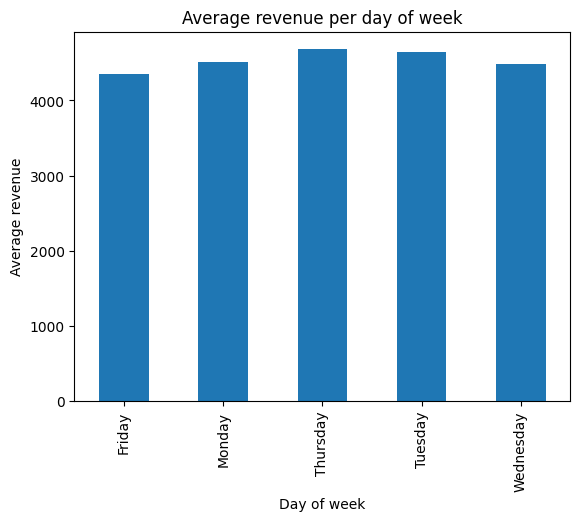

In [23]:
#vizuallasdiriram

import matplotlib.pyplot as plt

day_of_week.plot.bar()
plt.title('Average revenue per day of week')
plt.xlabel('Day of week')
plt.ylabel('Average revenue')
plt.show()


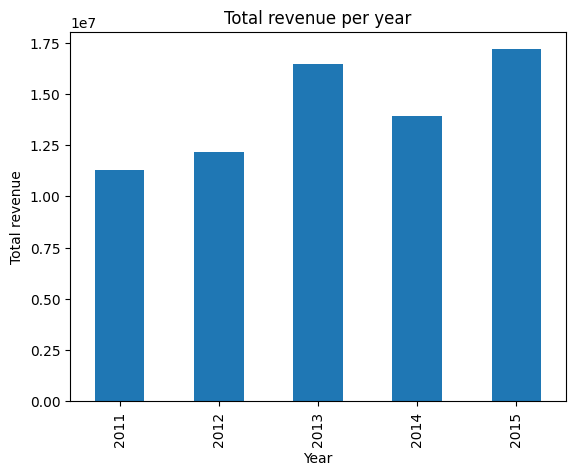

In [24]:
# iller uzre satishlara,tendensiyaya baxiram

df.groupby(['year'])['revenue'].sum().plot.bar()
plt.title('Total revenue per year')
plt.xlabel('Year')
plt.ylabel('Total revenue')
plt.show()


In [25]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week,revenue
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,3,3,2011-01-10,6,1,Louisville Race Equipment,"Louisville, KY",2011,1,2,Monday,12790
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,15,9,2011-01-25,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",2011,1,4,Tuesday,12790
2,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,35,9,2011-02-17,20,1,Portland Bi-peds,"Portland, OR",2011,2,7,Thursday,12790
3,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,38,1,2011-02-21,5,1,Cincinnati Speed,"Cincinnati, OH",2011,2,8,Monday,12790
4,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,42,10,2011-02-22,13,1,Oklahoma City Race Equipment,"Oklahoma City, OK",2011,2,8,Tuesday,12790


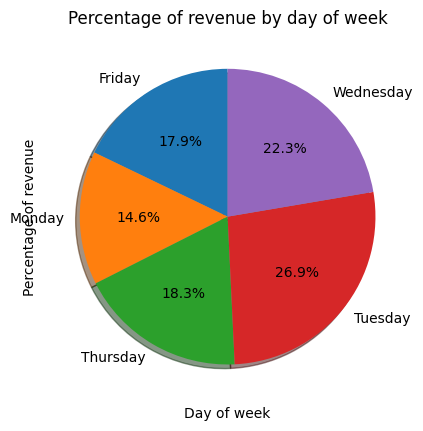

In [26]:
# heftenin gunleri uzre satis faizlerine pie chartla baxiram

df.groupby(['day_of_week'])['revenue'].sum().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of revenue by day of week')
plt.xlabel('Day of week')
plt.ylabel('Percentage of revenue')
plt.show()


In [27]:
# dataseti revenu sutununa gore coxdan aza duzurem

df = df.sort_values(by='revenue', ascending=False)
df.head()


,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week,revenue
151,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,Ann Arbor Speed,"Ann Arbor, MI",2012,3,12,Thursday,106600
23,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,Ann Arbor Speed,"Ann Arbor, MI",2012,3,12,Thursday,102320
12937,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,Albuquerque Cycles,"Albuquerque, NM",2015,6,24,Thursday,85750
8958,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,Columbus Race Equipment,"Columbus, OH",2013,7,31,Tuesday,81540
8948,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,Albuquerque Cycles,"Albuquerque, NM",2013,5,21,Tuesday,81540


In [28]:
# Her bir magazada cemi satishlari qruplasdiriram, total_revenue gore coxdan aza siralayiram

df2 = df.groupby(['bikeshop_name'])['revenue'].sum().reset_index().rename(columns={'revenue': 'total_revenue'}).sort_values(by='total_revenue', ascending=False)
df2.head()

,bikeshop_name,total_revenue
10,Kansas City 29ers,11535455
6,Denver Bike Shop,7697670
9,Ithaca Mountain Climbers,6299335
21,Phoenix Bi-peds,4168535
19,Oklahoma City Race Equipment,3450040


In [29]:
# magazalar uzre edilen satisin faiz nisbeti

df2['percentage_total_revenue'] = ((df2['total_revenue'] / df['revenue'].sum()) * 100).apply(lambda x: '{0:.2f}%'.format(x))
df2.head(20)


,bikeshop_name,total_revenue,percentage_total_revenue
10,Kansas City 29ers,11535455,16.24%
6,Denver Bike Shop,7697670,10.84%
9,Ithaca Mountain Climbers,6299335,8.87%
21,Phoenix Bi-peds,4168535,5.87%
19,Oklahoma City Race Equipment,3450040,4.86%
11,Las Vegas Cycles,3073615,4.33%
17,New Orleans Velocipedes,2761825,3.89%
29,Wichita Speed,2380385,3.35%
14,Miami Race Equipment,2057130,2.90%
15,Minneapolis Bike Shop,2023220,2.85%


In [30]:
###tekstleri balaca veya boyuk herflerle yazdir
#df2['bikeshop_name'].str.upper()
df2['bikeshop_name'].str.lower()

10               kansas city 29ers
6                 denver bike shop
9         ithaca mountain climbers
21                 phoenix bi-peds
19    oklahoma city race equipment
11                las vegas cycles
17         new orleans velocipedes
29                   wichita speed
14            miami race equipment
15           minneapolis bike shop
1                  ann arbor speed
23                portland bi-peds
13       louisville race equipment
3                 cincinnati speed
4          columbus race equipment
22    pittsburgh mountain machines
26          san francisco cruisers
7                   detroit cycles
24              providence bi-peds
18                 new york cycles
16              nashville cruisers
0               albuquerque cycles
28                     tampa 29ers
12              los angeles cycles
8         indianapolis velocipedes
20          philadelphia bike shop
2                  austin cruisers
5                    dallas cycles
25           san ant

In [31]:
##Yadda saxla
df['bikeshop_name'] = df2['bikeshop_name'].str.lower()
df2.head()

,bikeshop_name,total_revenue,percentage_total_revenue
10,Kansas City 29ers,11535455,16.24%
6,Denver Bike Shop,7697670,10.84%
9,Ithaca Mountain Climbers,6299335,8.87%
21,Phoenix Bi-peds,4168535,5.87%
19,Oklahoma City Race Equipment,3450040,4.86%


In [32]:
# Tekst tipli deyiseni ayirici ile ayir

new = df['location'].str.split(',', n = 1,expand = True)
new.head()

,0,1
151,Ann Arbor,MI
23,Ann Arbor,MI
12937,Albuquerque,NM
8958,Columbus,OH
8948,Albuquerque,NM


In [33]:
df['City'] = new[0]

In [34]:
df['Shtat'] = new[1]

In [35]:
#df-e ayirdigimiz sutunlari elave ele
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week,revenue,City,Shtat
151,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,NaN,"Ann Arbor, MI",2012,3,12,Thursday,106600,Ann Arbor,MI
23,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,portland bi-peds,"Ann Arbor, MI",2012,3,12,Thursday,102320,Ann Arbor,MI
12937,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,NaN,"Albuquerque, NM",2015,6,24,Thursday,85750,Albuquerque,NM
8958,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,NaN,"Columbus, OH",2013,7,31,Tuesday,81540,Columbus,OH
8948,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,NaN,"Albuquerque, NM",2013,5,21,Tuesday,81540,Albuquerque,NM


In [36]:
# str replace metodu

df['location'].replace('Ann Arbor, MI', 'Anna', inplace=True)



In [37]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week,revenue,City,Shtat
151,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,NaN,Anna,2012,3,12,Thursday,106600,Ann Arbor,MI
23,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,portland bi-peds,Anna,2012,3,12,Thursday,102320,Ann Arbor,MI
12937,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,NaN,"Albuquerque, NM",2015,6,24,Thursday,85750,Albuquerque,NM
8958,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,NaN,"Columbus, OH",2013,7,31,Tuesday,81540,Columbus,OH
8948,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,NaN,"Albuquerque, NM",2013,5,21,Tuesday,81540,Albuquerque,NM


In [38]:
# str replace

df['location'].replace('Anna', 'Ann Arbor, MI', inplace=True)

In [39]:
# df-i setirler uzre kes

df_3 = df.iloc[200:400]


In [40]:
# df-den hemin setirleri silirem

df.drop(df.index[200:400], inplace=True)


In [41]:
#df-in olcusunu yoxla
df.shape

(15444, 18)

In [42]:
#kesdiyim df-in olcuune bax
df_3.shape

(200, 18)

In [43]:
# sutun bashliqlari eyni oldugu ucun setirler uzre df-leri birlesdirirem

df = pd.concat([df,df_3],ignore_index=True)
df.shape

(15644, 18)

In [44]:
#yeni df yaradiram df-in icindeki shtati secirem
df3 = df['Shtat']

In [45]:
#df-den shtati silirem
df.drop('Shtat', axis = 1, inplace = True)

In [46]:
df.shape

(15644, 17)

In [47]:
# sutunlar uzre yeni yaratdigim df-i ve evvelki df-birlesdiriren
df = pd.concat([df, df3], axis=1)


In [48]:
#olculer duzeldi
df.shape

(15644, 18)

In [49]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week,revenue,City,Shtat
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,NaN,"Ann Arbor, MI",2012,3,12,Thursday,106600,Ann Arbor,MI
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,portland bi-peds,"Ann Arbor, MI",2012,3,12,Thursday,102320,Ann Arbor,MI
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,NaN,"Albuquerque, NM",2015,6,24,Thursday,85750,Albuquerque,NM
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,NaN,"Columbus, OH",2013,7,31,Tuesday,81540,Columbus,OH
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,NaN,"Albuquerque, NM",2013,5,21,Tuesday,81540,Albuquerque,NM


In [50]:
# qiymeti describe edirem
df['price'].describe()


count    15644.000000
mean      3521.110969
std       2667.194590
min        415.000000
25%       1840.000000
50%       2700.000000
75%       4260.000000
max      12790.000000
Name: price, dtype: float64

In [51]:
# df-in icinde yeni price group yaradiram, qiymeti 415-1840 arasi olanlara az, 1840-2700 arasi orta, digherlerine cox yazdiriram

df['price_group'] = np.where((df['price'] >= 415) & (df['price'] <= 1840), 'az', np.where((df['price'] > 1840) & (df['price'] <= 2700), 'orta', 'cox'))


In [52]:
df.tail()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week,revenue,City,Shtat,price_group
15639,54,Trigger Carbon 4,Mountain - Over Mountain - Carbon,3200,768,3,2013-04-04,5,5,NaN,"Cincinnati, OH",2013,4,14,Thursday,16000,Cincinnati,OH,cox
15640,7,Supersix Evo Ultegra 3,Road - Elite Road - Carbon,3200,135,6,2011-05-18,9,5,NaN,"Minneapolis, MN",2011,5,20,Wednesday,16000,Minneapolis,MN,cox
15641,59,Scalpel-Si Carbon 3,Mountain - Cross Country Race - Carbon,5330,637,1,2012-11-15,2,3,NaN,"Ithaca, NY",2012,11,46,Thursday,15990,Ithaca,NY,cox
15642,25,Synapse Hi-Mod Disc Ultegra,Road - Endurance Road - Carbon,5330,713,10,2013-03-04,19,3,NaN,"San Francisco, CA",2013,3,10,Monday,15990,San Francisco,CA,cox
15643,83,Habit Carbon 2,Mountain - Trail - Carbon,5330,1545,6,2015-02-10,2,3,NaN,"Ithaca, NY",2015,2,7,Tuesday,15990,Ithaca,NY,cox


In [53]:
# orta qiynmet qrupunda olanlari filtleyirem
df.loc[df['price_group'] == 'orta']


,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week,revenue,City,Shtat,price_group
121,41,Slice Ultegra,Road - Triathalon - Carbon,2700,696,5,2013-02-08,27,10,NaN,"San Antonio, TX",2013,2,6,Friday,27000,San Antonio,TX,orta
126,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,1862,3,2015-08-18,22,10,NaN,"Ann Arbor, MI",2015,8,34,Tuesday,26600,Ann Arbor,MI,orta
179,44,SuperX Ultegra,Road - Cyclocross - Carbon,2450,152,9,2011-06-08,13,10,NaN,"Oklahoma City, OK",2011,6,23,Wednesday,24500,Oklahoma City,OK,orta
185,41,Slice Ultegra,Road - Triathalon - Carbon,2700,712,23,2013-02-28,23,9,NaN,"Philadelphia, PA",2013,2,9,Thursday,24300,Philadelphia,PA,orta
186,41,Slice Ultegra,Road - Triathalon - Carbon,2700,1185,11,2014-04-03,10,9,NaN,"Kansas City, KS",2014,4,14,Thursday,24300,Kansas City,KS,orta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15570,72,F-Si 2,Mountain - Cross Country Race - Aluminum,2060,723,10,2013-03-11,16,9,NaN,"Phoenix, AZ",2013,3,11,Monday,18540,Phoenix,AZ,orta
15609,75,Fat CAAD2,Mountain - Fat Bike - Aluminum,2130,111,9,2011-04-26,10,8,NaN,"Kansas City, KS",2011,4,17,Tuesday,17040,Kansas City,KS,orta
15612,33,Synapse Disc Adventure,Road - Endurance Road - Aluminum,2130,621,4,2012-10-23,25,8,NaN,"New Orleans, LA",2012,10,43,Tuesday,17040,New Orleans,LA,orta
15627,41,Slice Ultegra,Road - Triathalon - Carbon,2700,1241,25,2014-05-14,25,6,NaN,"New Orleans, LA",2014,5,20,Wednesday,16200,New Orleans,LA,orta


In [54]:
#df-e ad sutunu elave edirem, yalniz _bikes yazilacaqq
df['add'] = '_bikes'


In [55]:
df.head()


,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,location,year,month,week,day_of_week,revenue,City,Shtat,price_group,add
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,NaN,"Ann Arbor, MI",2012,3,12,Thursday,106600,Ann Arbor,MI,cox,_bikes
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,portland bi-peds,"Ann Arbor, MI",2012,3,12,Thursday,102320,Ann Arbor,MI,cox,_bikes
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,NaN,"Albuquerque, NM",2015,6,24,Thursday,85750,Albuquerque,NM,cox,_bikes
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,NaN,"Columbus, OH",2013,7,31,Tuesday,81540,Columbus,OH,cox,_bikes
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,NaN,"Albuquerque, NM",2013,5,21,Tuesday,81540,Albuquerque,NM,cox,_bikes


In [56]:
# df-e quantity stat sutunu elave edirem, price  - price gropu tire ile birlesdirirem

df['quantity_shtat'] = df['price'].astype(str) + ' - ' +  df['price_group']


In [57]:
df.head()

,product_id,model,description,price,order_id,order_line,order_date,customer_id,quantity,bikeshop_name,...,year,month,week,day_of_week,revenue,City,Shtat,price_group,add,quantity_shtat
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,NaN,...,2012,3,12,Thursday,106600,Ann Arbor,MI,cox,_bikes,10660 - cox
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,portland bi-peds,...,2012,3,12,Thursday,102320,Ann Arbor,MI,cox,_bikes,12790 - cox
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,NaN,...,2015,6,24,Thursday,85750,Albuquerque,NM,cox,_bikes,12250 - cox
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,NaN,...,2013,7,31,Tuesday,81540,Columbus,OH,cox,_bikes,9060 - cox
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,NaN,...,2013,5,21,Tuesday,81540,Albuquerque,NM,cox,_bikes,9060 - cox


In [58]:
#column adlarina suffix elave edirem
df.columns += '_some_suffix'
df

,product_id_some_suffix,model_some_suffix,description_some_suffix,price_some_suffix,order_id_some_suffix,order_line_some_suffix,order_date_some_suffix,customer_id_some_suffix,quantity_some_suffix,bikeshop_name_some_suffix,...,year_some_suffix,month_some_suffix,week_some_suffix,day_of_week_some_suffix,revenue_some_suffix,City_some_suffix,Shtat_some_suffix,price_group_some_suffix,add_some_suffix,quantity_shtat_some_suffix
0,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,405,9,2012-03-22,22,10,NaN,...,2012,3,12,Thursday,106600,Ann Arbor,MI,cox,_bikes,10660 - cox
1,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,405,3,2012-03-22,22,8,portland bi-peds,...,2012,3,12,Thursday,102320,Ann Arbor,MI,cox,_bikes,12790 - cox
2,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,1762,11,2015-06-11,14,7,NaN,...,2015,6,24,Thursday,85750,Albuquerque,NM,cox,_bikes,12250 - cox
3,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,954,10,2013-07-30,3,9,NaN,...,2013,7,31,Tuesday,81540,Columbus,OH,cox,_bikes,9060 - cox
4,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,846,7,2013-05-21,14,9,NaN,...,2013,5,21,Tuesday,81540,Albuquerque,NM,cox,_bikes,9060 - cox
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,54,Trigger Carbon 4,Mountain - Over Mountain - Carbon,3200,768,3,2013-04-04,5,5,NaN,...,2013,4,14,Thursday,16000,Cincinnati,OH,cox,_bikes,3200 - cox
15640,7,Supersix Evo Ultegra 3,Road - Elite Road - Carbon,3200,135,6,2011-05-18,9,5,NaN,...,2011,5,20,Wednesday,16000,Minneapolis,MN,cox,_bikes,3200 - cox
15641,59,Scalpel-Si Carbon 3,Mountain - Cross Country Race - Carbon,5330,637,1,2012-11-15,2,3,NaN,...,2012,11,46,Thursday,15990,Ithaca,NY,cox,_bikes,5330 - cox
15642,25,Synapse Hi-Mod Disc Ultegra,Road - Endurance Road - Carbon,5330,713,10,2013-03-04,19,3,NaN,...,2013,3,10,Monday,15990,San Francisco,CA,cox,_bikes,5330 - cox
